In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [2]:
import pandas as pd
new = pd.read_csv (r"C:\Users\cheta\Desktop\python\Machine learning Practise Projects\Random Forest\Breast cancer.csv")
new.head()

,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


# 2. Data Pre-Processing 

In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital_Status          4024 non-null   object
 3   T_Stage                 4024 non-null   object
 4   N_Stage                 4024 non-null   object
 5   6th_Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A_Stage                 4024 non-null   object
 9   Tumor_Size              4024 non-null   int64 
 10  Estrogen_Status         4024 non-null   object
 11  Progesterone_Status     4024 non-null   object
 12  Regional_Node_Examined  4024 non-null   int64 
 13  Reginol_Node_Positive   4024 non-null   int64 
 14  Survival_Months         4024 non-null   int64 
 15  Stat

#### 2.2. Data Manipulation

In [5]:
new.Status.value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

In [6]:
#Tenure to categorical column
def Survival_Months(new) :
    if new["Survival_Months"] <= 12 :
        return "Survival_Months-12"
    elif (new["Survival_Months"] > 12) & (new["Survival_Months"] <= 24 ):
        return "Survival_Months_13-24"
    elif (new["Survival_Months"] > 24) & (new["Survival_Months"] <= 48) :
        return "Survival_Months_25-48"
    elif (new["Survival_Months"] > 48) & (new["Survival_Months"] <= 60) :
        return "Survival_Months_49-60"
    elif new["Survival_Months"] > 60 :
        return "Survival_Months_gt_60"
    
    
new["Survival_Months"] = new.apply(lambda new:Survival_Months(new),axis = 1)

In [7]:
new.head()

,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,Survival_Months_49-60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,Survival_Months_gt_60,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,Survival_Months_gt_60,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,Survival_Months_gt_60,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,Survival_Months_49-60,Alive


# 3. Missing Value Identify & Treatment

In [8]:
# count the number of NaN values in each column
print(new.isnull().sum())

Age                       0
Race                      0
Marital_Status            0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
differentiate             0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
Status                    0
dtype: int64


In [9]:
new.columns

Index(['Age', 'Race', 'Marital_Status', 'T_Stage ', 'N_Stage', '6th_Stage',
       'differentiate', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Status'],
      dtype='object')

<Axes: ylabel='Tumor_Size'>

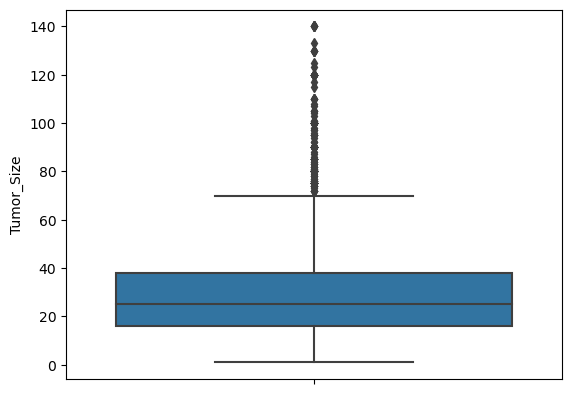

In [10]:
sns.boxplot(y = new.Tumor_Size)  # Single Variableb

In [11]:
q1 = new['Tumor_Size'].quantile(0.25)
q3 = new['Tumor_Size'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

71.0

In [12]:
new['Tumor_Size']=np.where(new['Tumor_Size'] > upper_limit,upper_limit,new['Tumor_Size']) # upper limit

<Axes: ylabel='Tumor_Size'>

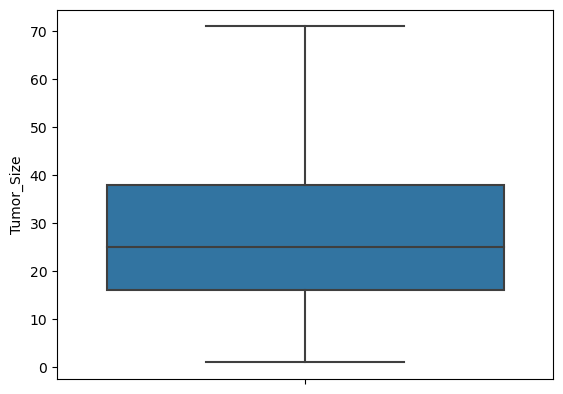

In [13]:
sns.boxplot(y = new.Tumor_Size)  # Single Variableb

<Axes: ylabel='Reginol_Node_Positive'>

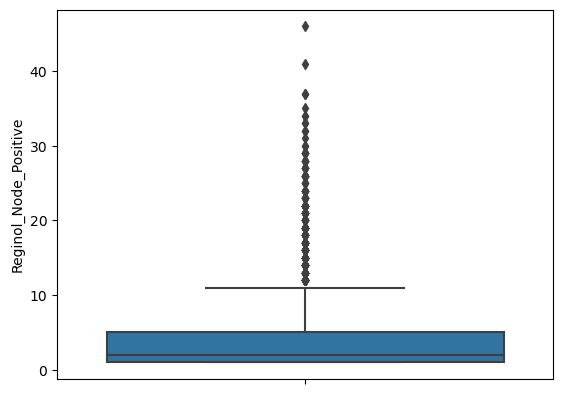

In [14]:
sns.boxplot(y = new.Reginol_Node_Positive )  # Single Variable

In [15]:
q1 = new['Reginol_Node_Positive'].quantile(0.25)
q3 = new['Reginol_Node_Positive'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

11.0

In [16]:
new['Reginol_Node_Positive']=np.where(new['Reginol_Node_Positive'] > upper_limit,upper_limit,new['Reginol_Node_Positive']) # upper limit

<Axes: ylabel='Reginol_Node_Positive'>

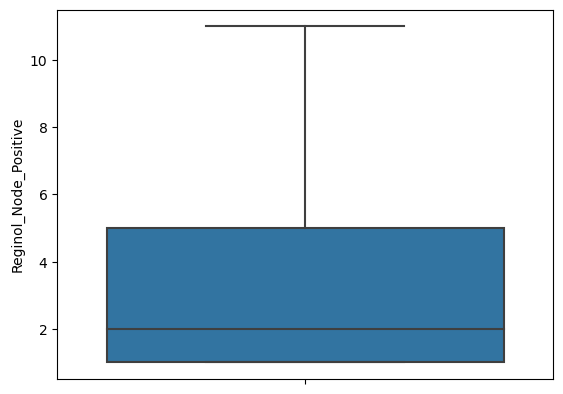

In [17]:
sns.boxplot(y = new.Reginol_Node_Positive )  # Single Variable

<Axes: ylabel='Regional_Node_Examined'>

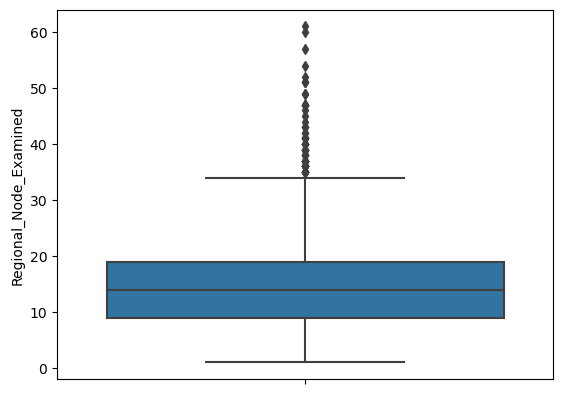

In [18]:
sns.boxplot(y = new.Regional_Node_Examined )  # Single Variable

In [19]:
q1 = new['Regional_Node_Examined'].quantile(0.25)
q3 = new['Regional_Node_Examined'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

34.0

In [20]:
new['Regional_Node_Examined']=np.where(new['Regional_Node_Examined'] > upper_limit,upper_limit,new['Regional_Node_Examined']) # upper limit

<Axes: ylabel='Regional_Node_Examined'>

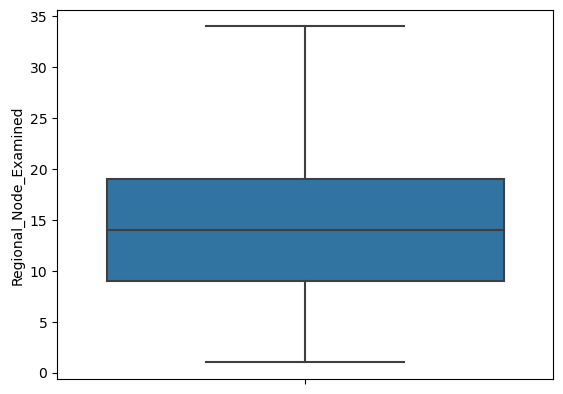

In [21]:
sns.boxplot(y = new.Regional_Node_Examined )  # Single Variable

In [22]:
import plotly.express as px

fig = px.pie(new,names='Status',color='Status',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# 5.Labeling the data 

In [23]:
new.head()

,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1.0,Survival_Months_49-60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5.0,Survival_Months_gt_60,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7.0,Survival_Months_gt_60,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1.0,Survival_Months_gt_60,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1.0,Survival_Months_49-60,Alive


In [24]:
new.select_dtypes(include=[np.number]).columns.tolist()

['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']

In [25]:
# #Employee Numeric columns
new_num = new[new.select_dtypes(include=[np.number]).columns.tolist()]
new_num.head(3)

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive
0,68,4.0,24.0,1.0
1,50,35.0,14.0,5.0
2,58,63.0,14.0,7.0


In [26]:
new_dummies = new[new.select_dtypes(include=['object']).columns.tolist()]
new_dummies.head(3)

,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Estrogen_Status,Progesterone_Status,Survival_Months,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Survival_Months_49-60,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Survival_Months_gt_60,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Survival_Months_gt_60,Alive


In [27]:
from sklearn.preprocessing import LabelEncoder
new_dummies=new_dummies.apply(LabelEncoder().fit_transform)
new_dummies.head(3)
# label in ascending order

,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Estrogen_Status,Progesterone_Status,Survival_Months,Status
0,2,1,0,0,0,1,3,1,1,1,3,0
1,2,1,1,1,2,0,2,1,1,1,4,0
2,2,0,2,2,4,0,2,1,1,1,4,0


In [28]:
new = pd.concat([new_num, new_dummies],axis=1)
new.head()

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Estrogen_Status,Progesterone_Status,Survival_Months,Status
0,68,4.0,24.0,1.0,2,1,0,0,0,1,3,1,1,1,3,0
1,50,35.0,14.0,5.0,2,1,1,1,2,0,2,1,1,1,4,0
2,58,63.0,14.0,7.0,2,0,2,2,4,0,2,1,1,1,4,0
3,58,18.0,2.0,1.0,2,1,0,0,0,1,3,1,1,1,4,0
4,47,41.0,3.0,1.0,2,1,1,0,1,1,3,1,1,1,3,0


# Data Partition 

In [29]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = new.drop('Status', axis = 1)
Y = new[['Status']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [30]:
X_train.shape

(2816, 15)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=20)

# Importance Features

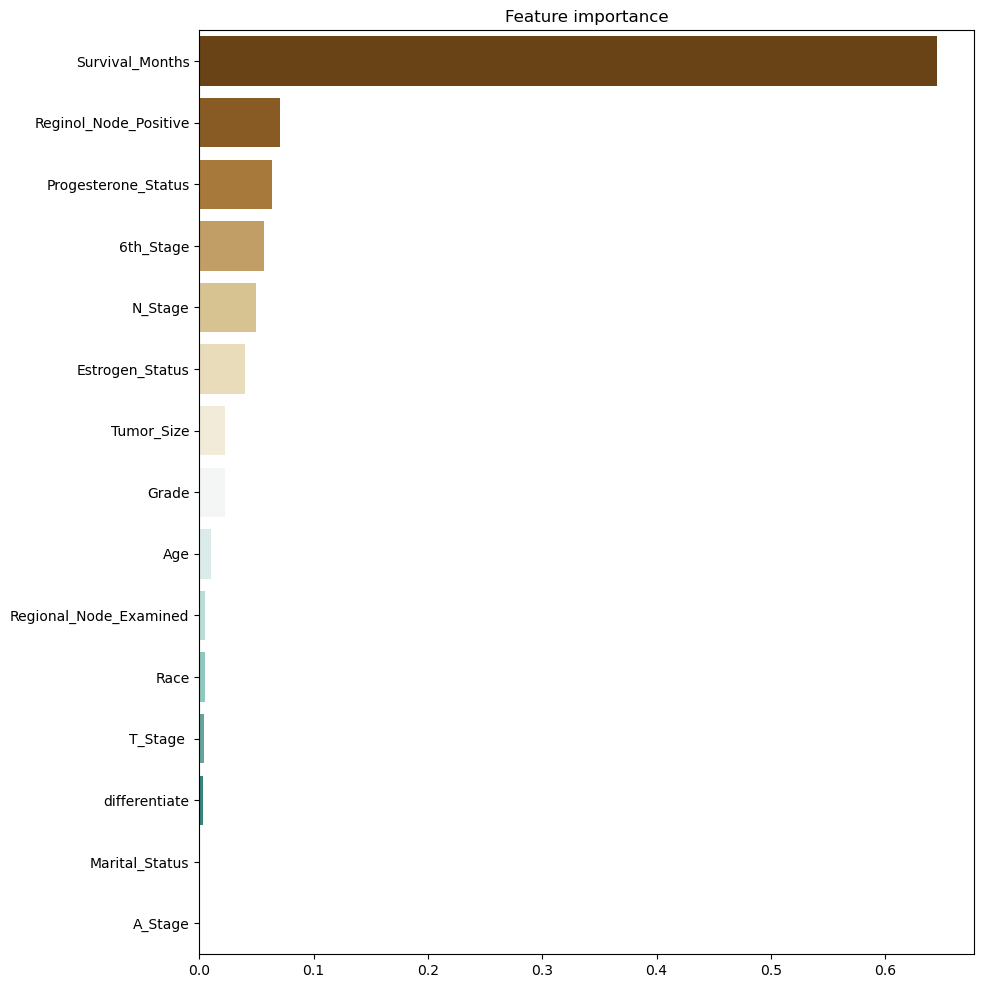

In [32]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

# Random Forest Visualization

In [33]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [34]:
list(X.columns)

['Age',
 'Tumor_Size',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Race',
 'Marital_Status',
 'T_Stage ',
 'N_Stage',
 '6th_Stage',
 'differentiate',
 'Grade',
 'A_Stage',
 'Estrogen_Status',
 'Progesterone_Status',
 'Survival_Months']

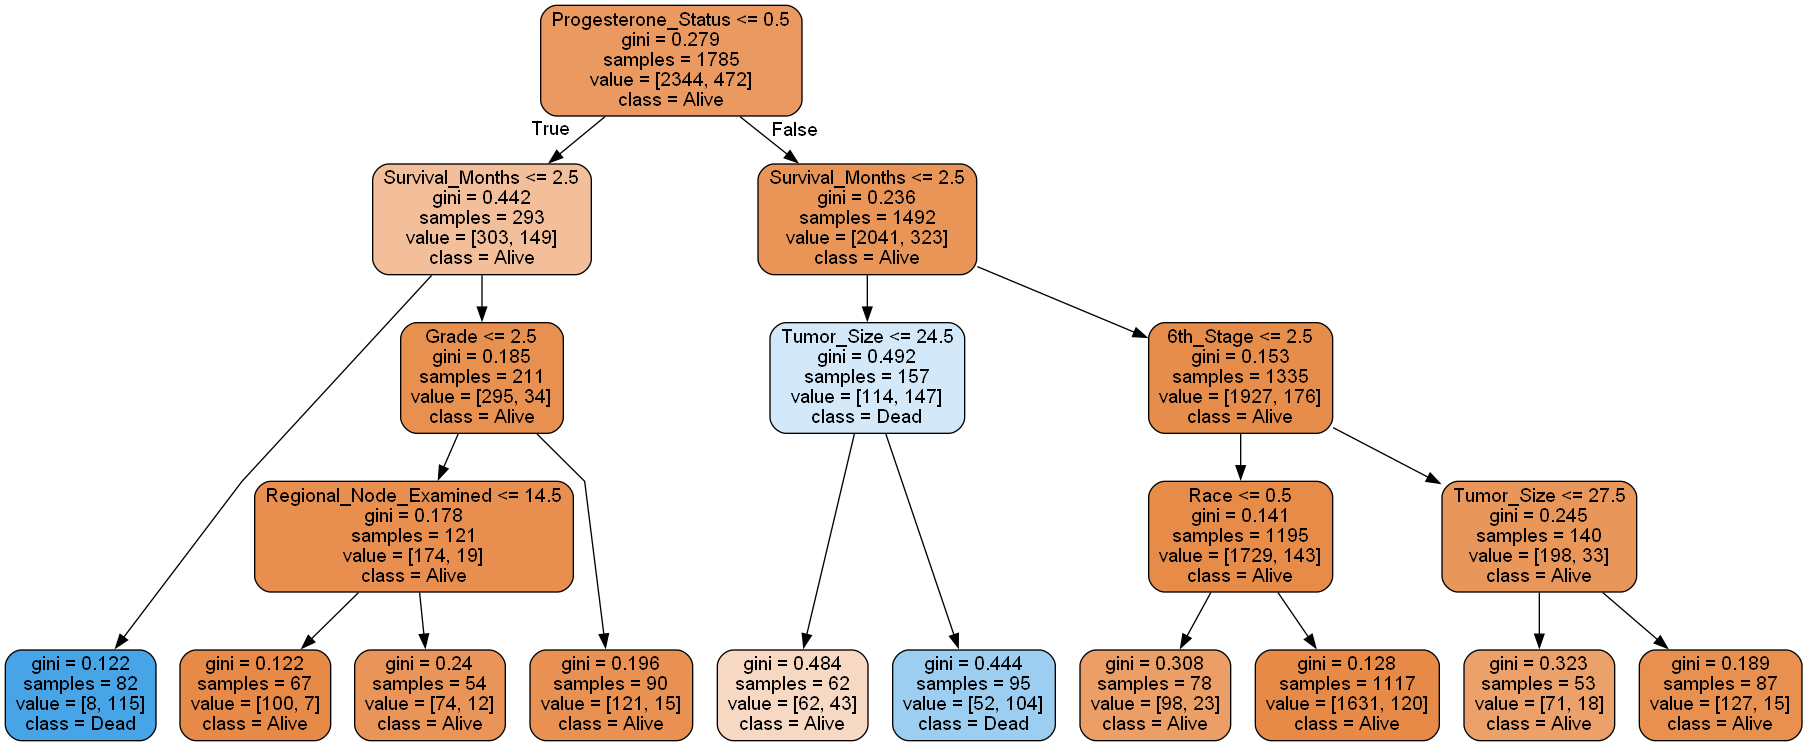

In [35]:
tree = Model.estimators_[19]  # specify the tree number   
Status=['Alive','Dead'] 
feature_list = list(X.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Status,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset

In [36]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Estrogen_Status,Progesterone_Status,Survival_Months,Status
1964,60,20.0,14.0,4.0,2,1,0,1,2,1,3,1,1,1,4,0
626,53,18.0,17.0,8.0,2,1,0,1,2,1,3,1,1,1,4,0
3662,48,7.0,2.0,1.0,2,1,0,0,0,0,2,1,1,1,4,0
2948,56,42.0,10.0,2.0,2,1,1,0,1,1,3,1,1,0,4,0
1644,51,15.0,12.0,3.0,2,1,0,0,0,1,3,1,1,1,4,0


In [37]:
train['Predicted']=Model.predict(X_train)
train.head()

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Estrogen_Status,Progesterone_Status,Survival_Months,Status,Predicted
1964,60,20.0,14.0,4.0,2,1,0,1,2,1,3,1,1,1,4,0,0
626,53,18.0,17.0,8.0,2,1,0,1,2,1,3,1,1,1,4,0,0
3662,48,7.0,2.0,1.0,2,1,0,0,0,0,2,1,1,1,4,0,0
2948,56,42.0,10.0,2.0,2,1,1,0,1,1,3,1,1,0,4,0,0
1644,51,15.0,12.0,3.0,2,1,0,0,0,1,3,1,1,1,4,0,0


# Step 7 : Model Performance Metrics

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Status'], train['Predicted'])
print(confusion_matrix)

[[2339   29]
 [ 256  192]]


In [39]:
Accuracy_Train=((2348+135)/(2816)*100)
print(Accuracy_Train)

88.1747159090909


In [40]:
from sklearn.metrics import classification_report
print(classification_report(train['Status'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2368
           1       0.87      0.43      0.57       448

    accuracy                           0.90      2816
   macro avg       0.89      0.71      0.76      2816
weighted avg       0.90      0.90      0.88      2816



# Step 8 : Predictions on Test Dataset

In [41]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Estrogen_Status,Progesterone_Status,Survival_Months,Status
786,61,18.0,18.0,11.0,2,1,3,0,3,0,2,0,1,1,4,0
2876,35,14.0,17.0,3.0,0,1,0,0,0,1,3,1,0,0,4,0
827,47,23.0,6.0,5.0,2,1,1,0,1,0,2,1,1,1,3,0
2596,54,35.0,13.0,2.0,2,1,1,0,1,1,3,1,1,1,3,0
4011,62,25.0,24.0,4.0,2,4,1,1,2,0,2,1,1,1,4,0


In [42]:
test['Predicted']=Model.predict(X_test)
test.head()

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Estrogen_Status,Progesterone_Status,Survival_Months,Status,Predicted
786,61,18.0,18.0,11.0,2,1,3,0,3,0,2,0,1,1,4,0,0
2876,35,14.0,17.0,3.0,0,1,0,0,0,1,3,1,0,0,4,0,0
827,47,23.0,6.0,5.0,2,1,1,0,1,0,2,1,1,1,3,0,0
2596,54,35.0,13.0,2.0,2,1,1,0,1,1,3,1,1,1,3,0,0
4011,62,25.0,24.0,4.0,2,4,1,1,2,0,2,1,1,1,4,0,0


# Step 9 : Model Performance Metrics on Test data 

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Status'])
print(confusion_matrix)

[[1022  112]
 [  18   56]]


In [44]:
Accuracy_test=((1036+36)/(1208)*100)
Accuracy_test

88.74172185430463

In [45]:
from sklearn.metrics import classification_report
print(classification_report(test['Status'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1040
           1       0.76      0.33      0.46       168

    accuracy                           0.89      1208
   macro avg       0.83      0.66      0.70      1208
weighted avg       0.88      0.89      0.87      1208



# Finish

## Business Submission

#### Confusion Matrix on Train

In [46]:
print(classification_report(train['Status'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2368
           1       0.87      0.43      0.57       448

    accuracy                           0.90      2816
   macro avg       0.89      0.71      0.76      2816
weighted avg       0.90      0.90      0.88      2816



#### Model

In [47]:
import pickle

pickle.dump(Model, open('RF_Model.pkl','wb'))  # Exporting model from python to laptop

# Business Use Case -- Live Data

In [48]:
Finalmodel=pickle.load(open('RF_Model.pkl','rb'))  # import Model from laptop to python 

In [49]:
Live_data=X_test.iloc[0:4,:]
Live_data

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Estrogen_Status,Progesterone_Status,Survival_Months
786,61,18.0,18.0,11.0,2,1,3,0,3,0,2,0,1,1,4
2876,35,14.0,17.0,3.0,0,1,0,0,0,1,3,1,0,0,4
827,47,23.0,6.0,5.0,2,1,1,0,1,0,2,1,1,1,3
2596,54,35.0,13.0,2.0,2,1,1,0,1,1,3,1,1,1,3


In [50]:
Live_data['Predicted']=Finalmodel.predict(Live_data)
Live_data

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Estrogen_Status,Progesterone_Status,Survival_Months,Predicted
786,61,18.0,18.0,11.0,2,1,3,0,3,0,2,0,1,1,4,0
2876,35,14.0,17.0,3.0,0,1,0,0,0,1,3,1,0,0,4,0
827,47,23.0,6.0,5.0,2,1,1,0,1,0,2,1,1,1,3,0
2596,54,35.0,13.0,2.0,2,1,1,0,1,1,3,1,1,1,3,0


* 0 = Patients will not have breast cancer 
* 1 = Patients will have breast cancer ( keep a eye on this )